# Explanation of the Fraud Detection Project

This project revolves around analyzing a month’s worth of DoorDash delivery data to identify patterns of fraudulent transactions. The goal is to determine characteristics of fraudulent behavior and provide actionable recommendations to reduce fraud losses.

## Objective:
The primary objective of the project is to use historical transaction data to:
1. Identify key indicators of fraudulent chargebacks.
2. Calculate the financial impact of fraudulent activities.
3. Make specific, data-driven recommendations to mitigate future fraud risks.

The dataset includes several variables that capture order details, user behavior, and chargeback information, enabling us to perform an analysis of fraud-related behavior and derive actionable insights.
ights
s.


# Features

DELIVERY_ID	- ID of Order

CREATED_AT -	Timestamp for order creation

CONSUMER_ID	- ID of consumer account

GOV	- Gross Order Value, in cents. This includes the subtotal of all items, all fees, taxes, and tip

CX_AGE_ON_DELIVERY_BASED_ON_FIRST_ORDER - Age of consumer in days when the consumer when delivery was created, calculated from the day of the first order created by the consumer

PLATFORM - Platform of device used upon checkout

RECEIVED_CHARGEBACK - Whether or not this delivery has a chargeback associated with it

IS_FRAUDULENT_CHARGEBACK -	Whether or not the chargeback received was related to fraud reasons. This is true when the dispute reason is in ('fraudulent', 'unrecognized', 'general'), based on the information submitted to the card issuer by the card owner

CHARGEBACK_COST - Chargeback cost in cents is the total potential cost of chargebacks to us. Each chargeback cost is compromised of the original chargeback amount (usually entire transaction amount) + a flat chargeback processing fee that is paid to our payment processor. If we 'win' the chargeback, this value goes to 0.

CX_DEVICE_ORDER_NUM	- The order number placed by this device + consumer

CX_ADDRESS_ORDER_NUM -	The order number placed to this address by this consumer

CX_CARD_ORDER_NUM - The order number placed using this card fingerprint by this consumer

CX_ORDER_NUM - The order number placed by this consumer

CX_UNIQUE_ADDRESSES	- Total number of unique addresses this consumer has ever used up to today

UNIQUE_ADDRESS_PAST_1DAY - 	Unique addresses this consumer has placed deliveries to in the 24 hours from this delivery creation datetime

UNIQUE_ADDRESS_PAST_7DAY - Unique addresses this consumer has placed deliveries to in the 24 * 7 hours from this delivery creation datetime

SIFT_CREATE_ORDER_PA_SCORE - Sift score of the event associated with this delivery creation

FAIL_CHARGES_1HR - 	Failed charge transaction attempts in the past 1 hour from this delivery creation datetime

FAIL_CHARGES_1D - 	Failed charge transaction attempts in the past 24 hours from this delivery creation datetime

FAIL_CHARGES_7D	- Failed charge transaction attempts in the past 24 * 7 hours from this delivery creation datetime

DEVICE_DELIVERIES - Total number of deliveries placed by this device up to today

DEVICE_PCT_CHARGEBACK - % of DEVICE_DELIVERIES that have received a chargeback

CCR_PAST_DELIVERIES	- Total number of deliveries placed by this consumer prior to this delivery

CCR_CHARGEBACK_DELIVERIES - Total number of chargebacks received by this consumer prior to this delivery

CX_PCT_CHARGEBACK -	CCR_CHARGEBACK_DELIVERIES / CCR_PAST_DELIVERIES

# Step 1: Data Loading and Cleaning

**Objective**: Load the data and clean it to ensure that the dataset is ready for analysis. This involves handling missing values, ensuring consistency, and preparing the data for analysis.

**Explanation**:
- We load the dataset using `pandas` and inspect it for missing values.
- Handling missing values is crucial as incomplete data can distort the analysis.
- For columns like `CHARGEBACK_COST`, missing values likely indicate that no chargeback occurred, so we fill them with 0.
- We drop rows with missing values for critical columns such as `GOV` (Gross Order Value) and `PLATFORM`, as they are essential for accurate analysis.
.
ysis.


# Assumptions

1. **Missing values in CHARGEBACK_COST**:
   - We assume that if a chargeback cost is missing, no chargeback occurred, so we fill missing values with 0.

2. **Dropping rows with missing GOV and PLATFORM**:
   - We assume that orders without GOV (Gross Order Value) or PLATFORM data are incomplete and cannot contribute meaningfully to the analysis. Therefore, we drop these rows to avoid skewing the results.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel(r"C:\Users\Admin1\DADS\Dhruv\Fraud Take Home Sheet.xlsx")
data

,DELIVERY_ID,CREATED_AT,CONSUMER_ID,GOV,CX_AGE_ON_DELIVERY_BASED_ON_FIRST_ORDER,PLATFORM,RECEIVED_CHARGEBACK,IS_FRAUDULENT_CHARGEBACK,CHARGEBACK_COST,CX_DEVICE_ORDER_NUM,...,UNIQUE_ADDRESS_PAST_7DAY,SIFT_CREATE_ORDER_PA_SCORE,FAIL_CHARGES_1HR,FAIL_CHARGES_1D,FAIL_CHARGES_7D,DEVICE_DELIVERIES,DEVICE_PCT_CHARGEBACK,CCR_PAST_DELIVERIES,CCR_CHARGEBACK_DELIVERIES,CX_PCT_CHARGEBACK
0,139828699,2019-01-26T16:25:41.892442Z,61252266,4165.0,30,Android,1,1,4915.0,18,...,NaN,23.220653,0,0,0,26.0,0.884615,17.0,15.0,0.882353
1,131547392,2019-01-08T18:48:52.361762Z,69633333,2241.0,0,Android,1,1,3342.0,1,...,NaN,18.570850,0,0,0,25.0,0.720000,NaN,NaN,NaN
2,136556035,2019-01-19T19:59:37.33425Z,70766026,1608.0,11,iOS,1,1,3108.0,1,...,NaN,8.085531,0,0,0,1.0,1.000000,1.0,0.0,0.000000
3,137519386,2019-01-21T18:03:40.010228Z,55565116,2544.0,103,iOS,1,1,3294.0,18,...,1.0,55.224335,0,0,2,42.0,0.761905,32.0,28.0,0.875000
4,141914918,2019-01-30T20:06:40.560294Z,38639326,3653.0,169,iOS,1,1,4840.0,17,...,1.0,50.103519,0,0,0,18.0,0.388889,37.0,21.0,0.567568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131345034,2019-01-08T00:53:30.371702Z,43310133,2172.0,183,iOS,0,0,NaN,11,...,NaN,5.179457,0,0,0,22.0,0.000000,13.0,0.0,0.000000
9996,133681824,2019-01-13T04:52:57.19029Z,33339275,4860.0,315,iOS,0,0,NaN,4,...,NaN,6.039735,0,0,0,23.0,0.000000,13.0,0.0,0.000000
9997,132964919,2019-01-12T00:05:28.126869Z,61732477,1982.0,55,iOS,0,0,NaN,14,...,NaN,12.764795,0,0,0,71.0,0.112676,13.0,0.0,0.000000
9998,138556548,2019-01-23T23:40:48.751849Z,48896146,3638.0,147,iOS,0,0,NaN,25,...,NaN,20.276335,0,0,0,38.0,0.000000,41.0,0.0,0.000000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 DELIVERY_ID                                   0
CREATED_AT                                    0
CONSUMER_ID                                   0
GOV                                         266
CX_AGE_ON_DELIVERY_BASED_ON_FIRST_ORDER       0
PLATFORM                                    395
RECEIVED_CHARGEBACK                           0
IS_FRAUDULENT_CHARGEBACK                      0
CHARGEBACK_COST                            9800
CX_DEVICE_ORDER_NUM                           0
CX_ADDRESS_ORDER_NUM                          0
CX_CARD_ORDER_NUM                             0
CX_ORDER_NUM                                  0
CX_UNIQUE_ADDRESSES                           7
UNIQUE_ADDRESS_PAST_1DAY                   8861
UNIQUE_ADDRESS_PAST_7DAY                   8861
SIFT_CREATE_ORDER_PA_SCORE                  542
FAIL_CHARGES_1HR                              0
FAIL_CHARGES_1D                               0
FAIL_CHARGES_7D                               0
DEVICE_D

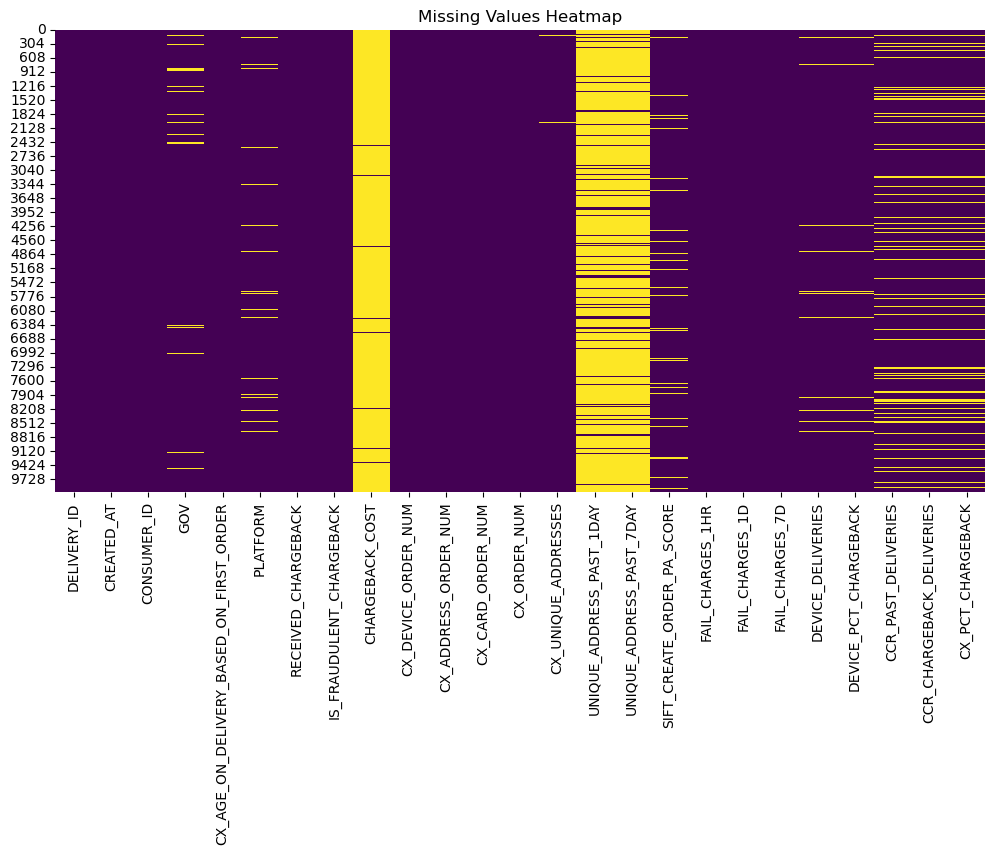

In [ ]:
# Visualizing missing values as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


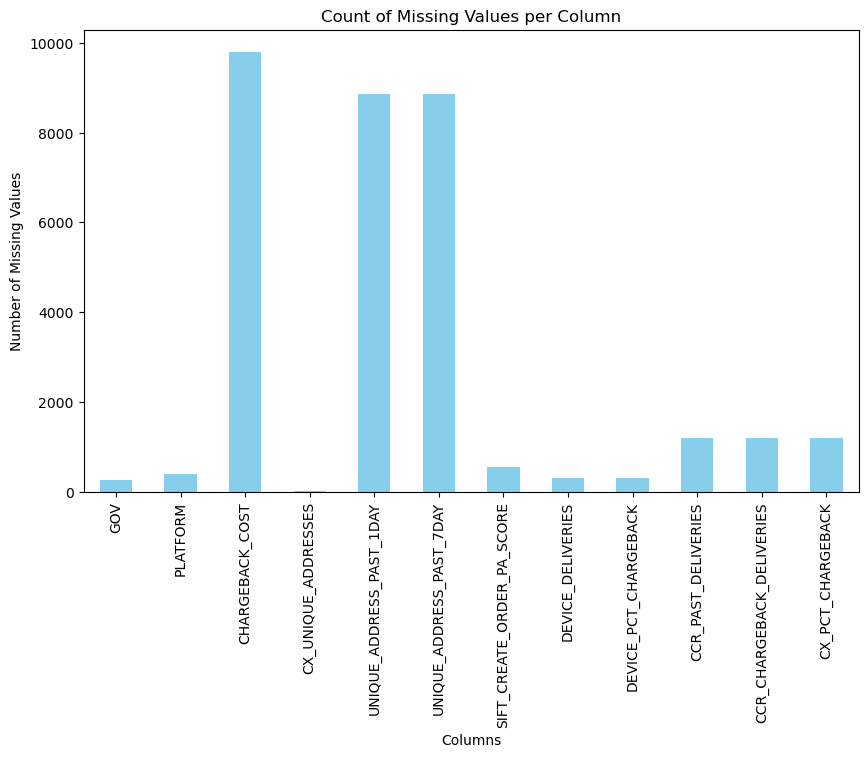

In [ ]:
# Count of missing values per column
missing_values = data.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title("Count of Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()


In [ ]:
# Fill missing chargeback costs with 0
data_cleaned = data.copy()
data_cleaned['CHARGEBACK_COST'] = data_cleaned['CHARGEBACK_COST'].fillna(0)

# Drop rows with missing GOV and PLATFORM values
data_cleaned.dropna(subset=['GOV', 'PLATFORM'], inplace=True)

# Fill remaining missing values with 0
data_cleaned.fillna(0, inplace=True)

print("Missing values after cleaning:\n", data_cleaned.isnull().sum())


Missing values after cleaning:
 DELIVERY_ID                                0
CREATED_AT                                 0
CONSUMER_ID                                0
GOV                                        0
CX_AGE_ON_DELIVERY_BASED_ON_FIRST_ORDER    0
PLATFORM                                   0
RECEIVED_CHARGEBACK                        0
IS_FRAUDULENT_CHARGEBACK                   0
CHARGEBACK_COST                            0
CX_DEVICE_ORDER_NUM                        0
CX_ADDRESS_ORDER_NUM                       0
CX_CARD_ORDER_NUM                          0
CX_ORDER_NUM                               0
CX_UNIQUE_ADDRESSES                        0
UNIQUE_ADDRESS_PAST_1DAY                   0
UNIQUE_ADDRESS_PAST_7DAY                   0
SIFT_CREATE_ORDER_PA_SCORE                 0
FAIL_CHARGES_1HR                           0
FAIL_CHARGES_1D                            0
FAIL_CHARGES_7D                            0
DEVICE_DELIVERIES                          0
DEVICE_PCT_CHARGEBACK  

# Step 2: Fraudulent Transactions Analysis

**Objective**: Understand the characteristics of fraudulent transactions by comparing key metrics such as the SIFT score and Gross Order Value (GOV) for both fraudulent and non-fraudulent transactions.

**Key Features**:
- **SIFT_CREATE_ORDER_PA_SCORE**: A risk score that measures the likelihood of fraud.
- **IS_FRAUDULENT_CHARGEBACK**: A binary variable indicating whether a chargeback is associated with fraud.
- **GOV (Gross Order Value)**: The total value of an order.

**Approach**:
- Calculate the percentage of transactions that are flagged as fraudulent.
- Compare the SIFT score and Gross Order Value between fraudulent and non-fraudulent transactions.

**Insights from Analysis**:
- **Fraudulent Transactions**: Around 2.04% of all transactions were flagged as fraudulent.
- **SIFT Scores**: Fraudulent transactions have significantly higher average SIFT scores (~31.88) compared to non-fraudulent ones (~11.87), indicating that higher scores are associated with a higher probability of fraud.
- **GOV**: The average Gross Order Value (GOV) for fraudulent transactions is higher (~3721.93 cents) compared to non-fraudulent ones (~3336.02 cents), suggesting that fraudsters often place higher-value orders.
lue orders.


# Assumptions

1. **Fraudulent transactions are correctly labeled**:
   - We assume that the `IS_FRAUDULENT_CHARGEBACK` column correctly flags fraudulent chargebacks and that there are no misclassifications.

2. **SIFT Score is a proxy for fraud risk**:
   - We assume that a higher SIFT score correlates with higher fraud risk, based on the documentation provided. This means that SIFT score plays a significant role in identifying fraudulent behavior.

3. **Gross Order Value (GOV) influences fraud behavior**:
   - We assume that higher GOV (Gross Order Value) attracts fraudsters, who are likely trying to gain higher-value items. Therefore, analyzing GOV differences between fraudulent and non-fraudulent transactions is meaningful.


In [ ]:
# Calculate the number of fraudulent transactions and the percentage
fraudulent_count = data_cleaned['IS_FRAUDULENT_CHARGEBACK'].sum()
total_transactions = len(data_cleaned)
fraudulent_percentage = (fraudulent_count / total_transactions) * 100

# Calculate average SIFT score and GOV for fraudulent and non-fraudulent transactions
fraudulent_data = data_cleaned[data_cleaned['IS_FRAUDULENT_CHARGEBACK'] == 1]
non_fraudulent_data = data_cleaned[data_cleaned['IS_FRAUDULENT_CHARGEBACK'] == 0]

avg_sift_fraudulent = fraudulent_data['SIFT_CREATE_ORDER_PA_SCORE'].mean()
avg_sift_non_fraudulent = non_fraudulent_data['SIFT_CREATE_ORDER_PA_SCORE'].mean()

avg_gov_fraudulent = fraudulent_data['GOV'].mean()
avg_gov_non_fraudulent = non_fraudulent_data['GOV'].mean()

# Print results
print(f"Percentage of fraudulent transactions: {fraudulent_percentage:.2f}%")
print(f"Average SIFT score for fraudulent transactions: {avg_sift_fraudulent:.2f}")
print(f"Average SIFT score for non-fraudulent transactions: {avg_sift_non_fraudulent:.2f}")
print(f"Average GOV for fraudulent transactions: {avg_gov_fraudulent:.2f} cents")
print(f"Average GOV for non-fraudulent transactions: {avg_gov_non_fraudulent:.2f} cents")


Percentage of fraudulent transactions: 2.04%
Average SIFT score for fraudulent transactions: 31.88
Average SIFT score for non-fraudulent transactions: 11.87
Average GOV for fraudulent transactions: 3721.93 cents
Average GOV for non-fraudulent transactions: 3336.02 cents


# Visualization: Fraudulent vs Non-Fraudulent Transaction Characteristics

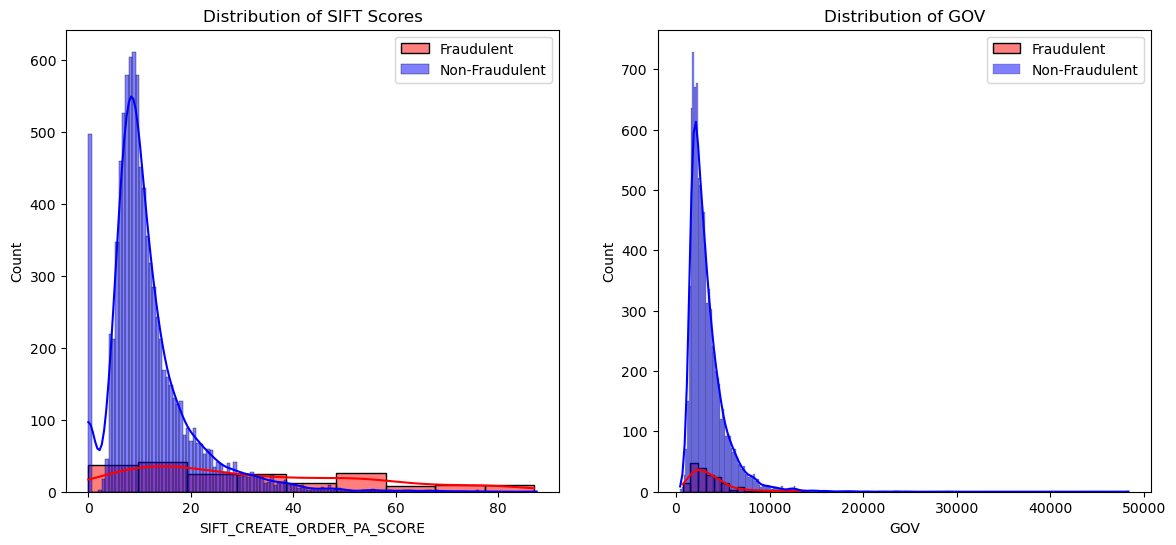

In [ ]:
# Visualize the comparison of SIFT score and GOV for fraudulent and non-fraudulent transactions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# SIFT Score distribution
sns.histplot(fraudulent_data['SIFT_CREATE_ORDER_PA_SCORE'], color='red', kde=True, ax=axes[0], label="Fraudulent")
sns.histplot(non_fraudulent_data['SIFT_CREATE_ORDER_PA_SCORE'], color='blue', kde=True, ax=axes[0], label="Non-Fraudulent")
axes[0].set_title('Distribution of SIFT Scores')
axes[0].legend()

# GOV distribution
sns.histplot(fraudulent_data['GOV'], color='red', kde=True, ax=axes[1], label="Fraudulent")
sns.histplot(non_fraudulent_data['GOV'], color='blue', kde=True, ax=axes[1], label="Non-Fraudulent")
axes[1].set_title('Distribution of GOV')
axes[1].legend()

plt.show()


**Explanation:**

The visualization allows us to see the difference in distributions between fraudulent and non-fraudulent transactions. Fraudulent transactions tend to have higher SIFT scores and higher GOV.

# Step 3: Financial Impact of Fraud

**Objective**: Quantify the financial loss caused by fraudulent chargebacks.

**Approach**:
- We calculate the total chargeback cost for all fraudulent transactions.
- This gives a clear picture of how much the company is losing due to fraud.

**Result**:
- The total financial loss due to fraudulent chargebacks amounts to **$8,267.58**. This significant cost highlights the importance of detecting and preventing fraud in real-time.
time.


# Step 3: Financial Impact of Fraud

**Assumptions**:
1. **Chargeback cost accurately reflects the financial loss**:
   - We assume that the `CHARGEBACK_COST` variable correctly captures the total cost of chargebacks, including transaction amounts and processing fees. If we "win" a chargeback, the cost becomes 0, so only true financial losses are recorded.

2. **All fraudulent chargebacks result in financial loss**:
   - We assume that every flagged fraudulent chargeback (non-zero cost) resulted in a real financial loss, and none of the transactions were later successfully disputed in favor of the company.


In [ ]:
# Calculate total financial loss due to fraudulent chargebacks
total_fraudulent_cost = fraudulent_data['CHARGEBACK_COST'].sum()

print(f"Total financial loss due to fraudulent chargebacks: ${total_fraudulent_cost / 100:.2f}")


Total financial loss due to fraudulent chargebacks: $8267.58


# Visualization: Chargeback Cost Analysis

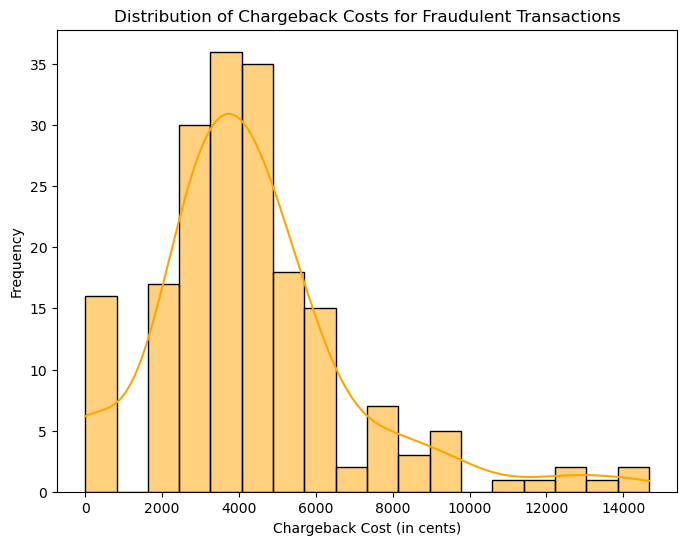

In [ ]:
# Visualize chargeback cost distribution for fraudulent transactions
plt.figure(figsize=(8, 6))
sns.histplot(fraudulent_data['CHARGEBACK_COST'], kde=True, color='orange')
plt.title('Distribution of Chargeback Costs for Fraudulent Transactions')
plt.xlabel('Chargeback Cost (in cents)')
plt.ylabel('Frequency')
plt.show()


**Explanation:**

This visualization shows how chargeback costs are distributed among fraudulent transactions. The peak indicates the most common chargeback cost range, providing insight into typical financial impacts.

# Step 4: Correlation Analysis

**Objective**: Understand which variables are most correlated with fraudulent behavior.

**Approach**:
- We compute the correlation matrix for key variables such as SIFT score, failed charges, chargeback cost, and fraudulent chargebacks.
- Correlation analysis helps identify which factors are most associated with fraud, allowing us to focus on those areas for prevention strategies.

**Results**:
- **SIFT Score** has a moderate positive correlation (0.30) with fraudulent chargebacks.
- **CHARGEBACK_COST** shows a strong correlation (0.84) with fraudulent chargebacks, as expected.
- **Failed Charges** (in the last 1 hour, day, and 7 days) have weaker correlations with fraud, which suggests they may not be as strong indicators as expected.


# Step 4: Correlation Analysis

**Assumptions**:
1. **Correlation indicates potential causality**:
   - While correlation does not prove causation, we assume that higher correlations between variables (e.g., SIFT score and fraudulent chargebacks) can be useful proxies for identifying fraud risk.

2. **Failed charge attempts are legitimate indicators of fraud**:
   - We assume that repeated failed charge attempts (within an hour, day, or week) are a signal of suspicious activity and are likely correlated with fraud, although they show a weaker correlation in the analysis.


In [ ]:
# Calculate correlation matrix for key variables
correlation_matrix = data_cleaned[['SIFT_CREATE_ORDER_PA_SCORE', 'FAIL_CHARGES_1HR', 'FAIL_CHARGES_1D', 'FAIL_CHARGES_7D', 'CHARGEBACK_COST', 'IS_FRAUDULENT_CHARGEBACK']].corr()



correlation_matrix

,SIFT_CREATE_ORDER_PA_SCORE,FAIL_CHARGES_1HR,FAIL_CHARGES_1D,FAIL_CHARGES_7D,CHARGEBACK_COST,IS_FRAUDULENT_CHARGEBACK
SIFT_CREATE_ORDER_PA_SCORE,1.000000,0.149084,0.213279,0.215754,0.261181,0.300771
FAIL_CHARGES_1HR,0.149084,1.000000,0.784315,0.385099,0.094695,0.087535
FAIL_CHARGES_1D,0.213279,0.784315,1.000000,0.466849,0.134322,0.142289
FAIL_CHARGES_7D,0.215754,0.385099,0.466849,1.000000,0.188793,0.199510
CHARGEBACK_COST,0.261181,0.094695,0.134322,0.188793,1.000000,0.835023
IS_FRAUDULENT_CHARGEBACK,0.300771,0.087535,0.142289,0.199510,0.835023,1.000000


# Visualization: Correlation Heatmap

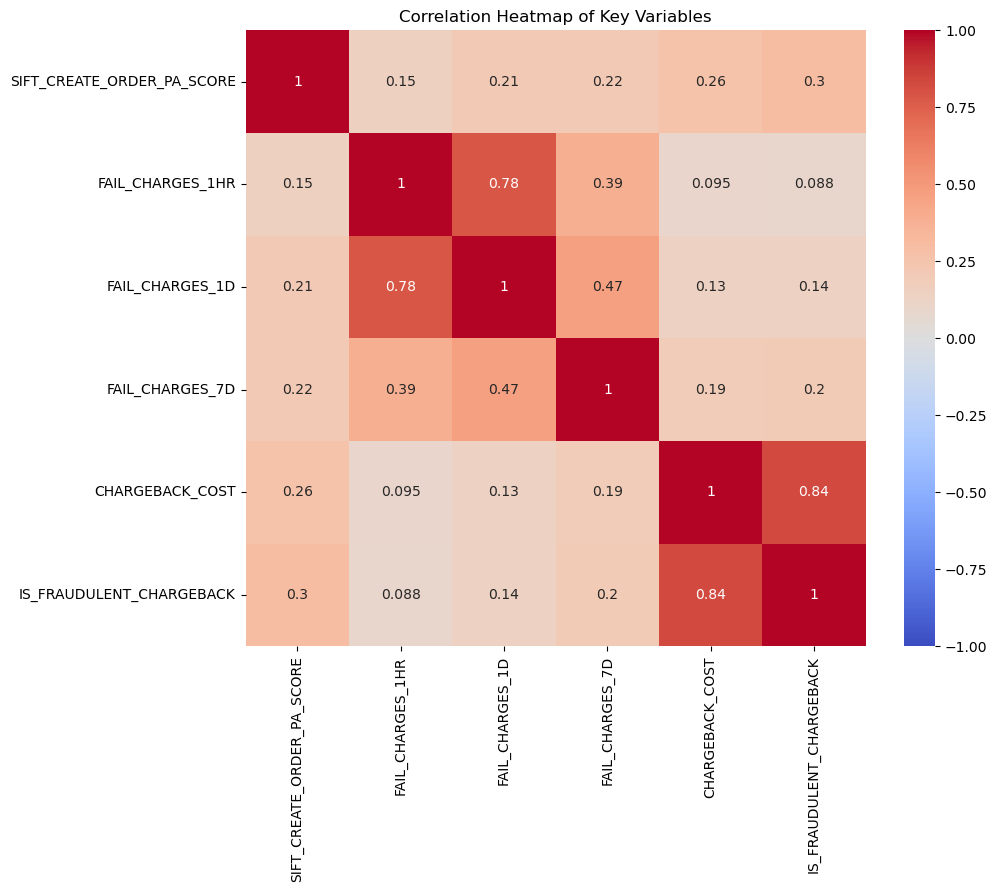

In [ ]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Key Variables')
plt.show()


**Explanation:**

The heatmap helps us quickly identify the strength of relationships between variables. For instance:

SIFT score shows a moderate correlation with fraudulent chargebacks.
Failed charges have weaker correlations with fraud, which might indicate they’re less reliable as standalone fraud indicators.

# Step 5: Visualizations

**Visualizations** help us to interpret the data more clearly. We visualize:
1. **SIFT Scores** for fraudulent and non-fraudulent transactions.
2. **Gross Order Value (GOV)** distribution for fraudulent and non-fraudulent transactions.
3. **Correlation Heatmap** to highlight the relationships between variables.

**Results**:
- The **SIFT Score distribution** shows that fraudulent transactions tend to have higher SIFT scores, supporting the idea that this score can be a good predictor of fraud.
- The **Gross Order Value (GOV) distribution** highlights that fraudulent transactions tend to involve higher-value orders.
- The **Correlation Heatmap** provides a visual summary of how strongly different variables relate to fraudulent chargebacks.


# Assumptions

1. **Visual trends indicate general patterns**:
   - We assume that the distributions of SIFT scores and GOV reflect meaningful differences between fraudulent and non-fraudulent transactions. Visualization is used to explore these trends, but statistical significance is determined through further tests if necessary.

2. **Correlation heatmaps provide actionable insights**:
   - We assume that the correlation heatmap helps in understanding the relationships between variables. We base recommendations for fraud prevention on these insights, despite the inherent limitations of correlation analysis.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Explanation

The first step in any machine learning process is data preparation. This includes selecting the most relevant features (columns) that are likely to help the model make accurate predictions. We also handle missing values to ensure the dataset is clean and doesn't cause issues during model training.

# Assumptions

1. **Features**: We assume that the selected features (e.g., SIFT score, failed charge attempts, Gross Order Value) are informative and relevant to the prediction task.

2. **Missing Values**: Missing values in key columns like `CHARGEBACK_COST` are assumed to mean no chargeback occurred, and thus, they are filled with 0.


In [ ]:
# Select relevant features for the model
features = [
    'SIFT_CREATE_ORDER_PA_SCORE', 'FAIL_CHARGES_1HR', 'FAIL_CHARGES_1D',
    'FAIL_CHARGES_7D', 'GOV', 'CX_DEVICE_ORDER_NUM', 'CX_CARD_ORDER_NUM'
]
X = data_cleaned[features]
y = data_cleaned['IS_FRAUDULENT_CHARGEBACK']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (important for some models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)


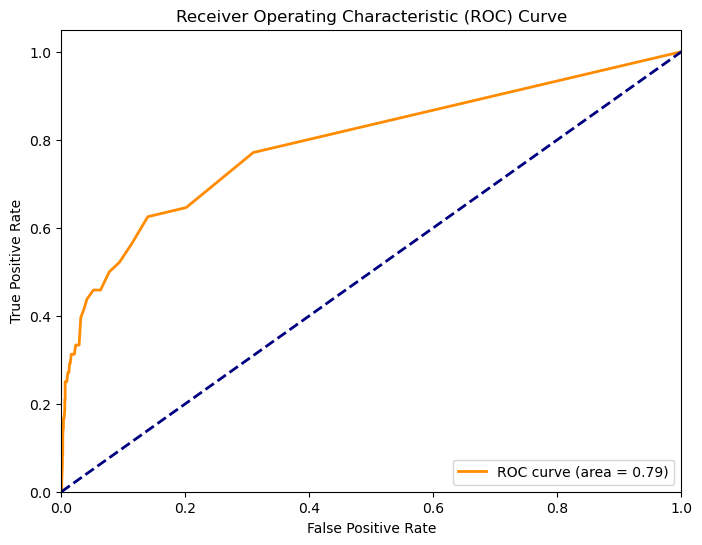

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate the ROC curve data
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Explanation

After training the model, we evaluate its performance using metrics such as accuracy, precision, recall, and F1-score. These metrics help us understand how well the model is distinguishing between fraudulent and non-fraudulent transactions.
Additionally, we compute a confusion matrix to visualize the number of correct and incorrect predictions.

# Assumptions

1. **Accuracy and Other Metrics**: We assume that the evaluation metrics provide a reliable indication of the model's performance. For example, precision measures how many predicted frauds were actually fraud, and recall measures how many actual frauds were identified.

2. **Balanced Dataset**: We assume that the dataset has a reasonable balance of fraudulent and non-fraudulent transactions. If the dataset is imbalanced (i.e., far more non-fraudulent transactions than fraudulent ones), we might need to use techniques like class weighting or resampling.


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.98
Precision: 0.58
Recall: 0.15
F1 Score: 0.23
Confusion Matrix:
[[1818    5]
 [  41    7]]


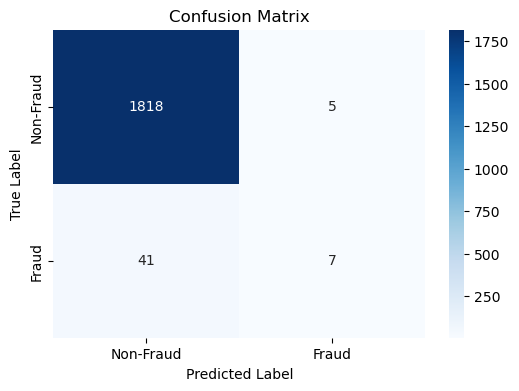

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Explanation

One of the advantages of Random Forest is that it provides feature importance, which tells us how important each feature is in predicting fraud. This allows us to better understand which features are most influential in identifying fraudulent transactions.

# Assumptions

1. **Feature Importance**: We assume that the feature importance scores provided by the Random Forest are reliable indicators of how much each feature contributes to the model’s predictions.


In [ ]:
# Get the feature importance from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
importances_df


,Feature,Importance
0,SIFT_CREATE_ORDER_PA_SCORE,0.418404
4,GOV,0.294924
5,CX_DEVICE_ORDER_NUM,0.105750
6,CX_CARD_ORDER_NUM,0.099738
3,FAIL_CHARGES_7D,0.047211
2,FAIL_CHARGES_1D,0.019073
1,FAIL_CHARGES_1HR,0.014900


C:\Users\Admin1\AppData\Local\Temp\ipykernel_10044\838090839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='Blues_d')


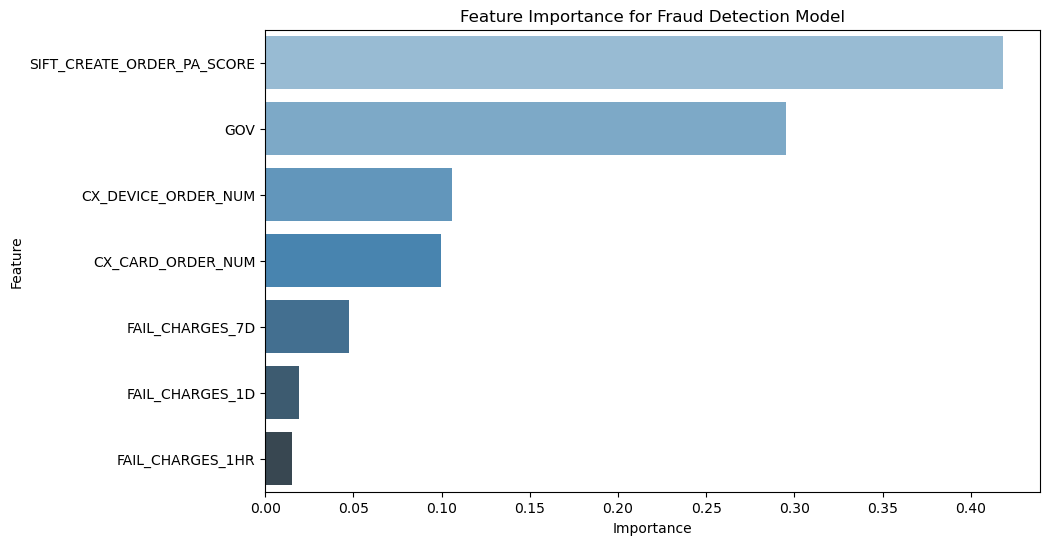

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='Blues_d')
plt.title('Feature Importance for Fraud Detection Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Explanation

Once the model is trained and evaluated, it can be used to make predictions on new transactions. For example, if a new transaction comes in, we can use the model to predict whether it is likely to be fraudulent.


In [ ]:
# Example: Predict whether a new transaction is fraudulent
new_transaction = [[30, 1, 0, 0, 3500, 10, 5]]  # Example data
new_transaction_scaled = scaler.transform(new_transaction)

fraud_prediction = rf_model.predict(new_transaction_scaled)
print("Fraud Prediction (1 = Fraudulent, 0 = Non-Fraudulent):", fraud_prediction)


Fraud Prediction (1 = Fraudulent, 0 = Non-Fraudulent): [0]


C:\Users\Admin1\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Step 6: Recommendations

**Based on the analysis, we recommend several actions to reduce fraud**:
1. **Implement SIFT Score-Based Rules**:
   - Transactions with a SIFT score above a certain threshold (e.g., 30) should trigger additional verification steps before being processed.
   
2. **Monitor Failed Charge Attempts**:
   - Transactions with multiple failed charge attempts (e.g., within the past hour or day) should be flagged for review.

3. **Tighten Controls for High-Value Orders**:
   - Orders with a high Gross Order Value (e.g., above $35) should undergo stricter verification as fraudsters tend to place larger orders.


# Assumptions

1. **Higher SIFT scores should trigger more scrutiny**:
   - We assume that SIFT scores reliably indicate fraud risk and that setting a threshold (e.g., 30) will help catch fraudulent transactions early. This is based on the moderate correlation observed between SIFT scores and fraudulent chargebacks.

2. **Failed charges are meaningful but secondary**:
   - We assume that failed charges (particularly within the last hour or day) are indicators of fraud but are less reliable than SIFT scores. Monitoring these events can help catch additional fraudsters, but it is not the primary indicator.

3. **Higher GOV transactions are more likely to be fraudulent**:
   - We assume that fraudsters target higher-value orders, making GOV a key factor to monitor. Applying stricter verification processes to higher-value transactions will help reduce fraud risks.

4. **Chargeback costs capture the full financial impact**:
   - We assume that the chargeback costs represent the total financial exposure to fraud and that these costs are accurately captured in the dataset.
